In [25]:
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

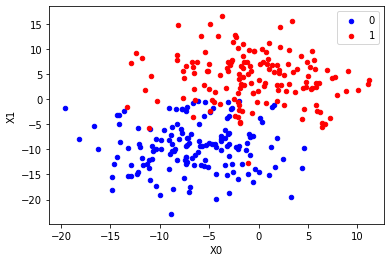

In [26]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue',1:'red'}
fig, ax = plt.subplots()
classified = df.groupby('label')
for key, group in classified:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [27]:
#Dividing the input into batches and return the values using
#an yield function (To have the state of local variable intact)
#FFor SGD, batch_size is 1 , where as for mini-batch , batch_size can be anything
input_size = X.shape[0]
def get_next_batch(X,Y,size_of_batch):
    for i in range(0,input_size,size_of_batch):
        yield (X[i:i+size_of_batch], Y[i:i+size_of_batch])


In [28]:
#Adding an additional column to the original features for the bias term
#np.c_ is used to concatenate entire column with 1's
X = np.c_[np.ones((input_size)),X]
X.shape

(300, 3)

In [29]:
# Definind Logistic Model and its cost function
import numpy as np
def sigmoid_function(s):
    return 1/(1+np.exp(-s))

def logistic_function(W,X):
    return sigmoid_function(np.dot(X,W))

def cost_function(W,X,Y):
    ypred = logistic_function(W,X)
    return -1*sum(Y*np.log(ypred) + (1-Y)*np.log(1- ypred))

In [30]:
def gradient(W,X,Y):
    ypred = logistic_function(W,X)
    cost = Y*(1 - ypred) - (1-Y)*ypred
    grad = -1*np.dot(cost.T,X)
    return grad

In [37]:
from sklearn.utils import shuffle
def mini_batch(new_weights, prev_weights, learning_rate, size_of_batch,epochs):
    Xs, Ys = shuffle(X, Y, random_state=0)
    for i in range(epochs):
        epoch_losses = []
        Xs, Ys = shuffle(X, Y, random_state=0)
        for (X_,Y_) in get_next_batch(Xs, Ys, size_of_batch):
            prev_weights = new_weights
            epoch_losses.append(cost_function(prev_weights,X,Y))
            gradients = gradient(prev_weights,X,Y)
            new_weights = prev_weights - learning_rate*gradients
        print(np.average(epoch_losses))
    return new_weights
        

In [35]:
#Initialize the weights
W = np.random.uniform(size=(X.shape[1],))
W.shape

(3,)

In [38]:
W = mini_batch(W, W, .009, 32, 200)
print(W)

<ipython-input-29-33d361ecf05c>:11: RuntimeWarning: divide by zero encountered in log
  return -1*sum(Y*np.log(ypred) + (1-Y)*np.log(1- ypred))
<ipython-input-29-33d361ecf05c>:11: RuntimeWarning: invalid value encountered in multiply
  return -1*sum(Y*np.log(ypred) + (1-Y)*np.log(1- ypred))


nan
nan
nan
147.92656603825205
133.15809965900027
119.929682545558
111.80612624164387
106.84135921771879
105.0774689944327
104.56055126764996
104.4202776588821
104.38307268571089
104.37326375895127
104.37068168916805
104.37000226861008
104.36982351152726
104.36977648145009
104.36976410816767
104.36976085285035
104.36975999640137
104.36975977107618
104.36975971179486
104.36975969619849
104.36975969209516
104.36975969101577
104.3697596907316
104.36975969065693
104.36975969063724
104.36975969063205
104.36975969063067
104.36975969063026
104.36975969063022
104.36975969063008
104.36975969063022
104.36975969063015
104.36975969063008
104.36975969063023
104.3697596906301
104.36975969063016
104.36975969063019
104.36975969063008
104.36975969063022
104.36975969063015
104.36975969063008
104.36975969063023
104.3697596906301
104.36975969063016
104.36975969063019
104.36975969063008
104.36975969063022
104.36975969063015
104.36975969063008
104.36975969063023
104.3697596906301
104.36975969063016
104.3697

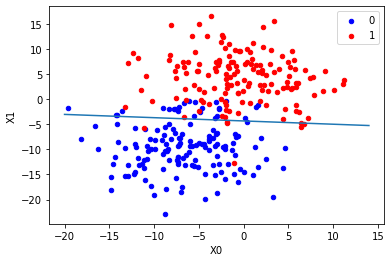

In [39]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def classification_line(x):
    return (-W[0]-W[1]*x)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue',1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(classification_line, range(-20,15))
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [40]:
#Implementing SGD
W = mini_batch(W, W, .009, 1, 200)
print(W)

104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969063013
104.36975969063015
104.36975969063015
104.36975969063013
104.36975969

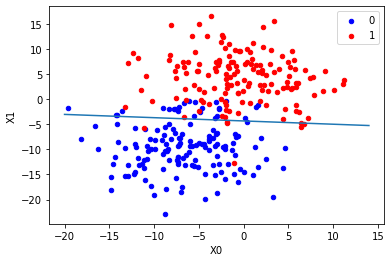

In [41]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue',1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(classification_line, range(-20,15))
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()